Shape of features (X): (1092, 8)
Shape of target (Y): (1092,)
Model Coefficients: [ -2.69417108   1.42962179  -4.56921212   0.22552321  -1.09482755
 -38.01007926  -1.84948254   0.49148598]
Model Intercept: 144.73192009613228
Mean Squared Error (MSE): 3215.580699767621
R-squared (R2 Score): 0.4865801815607954


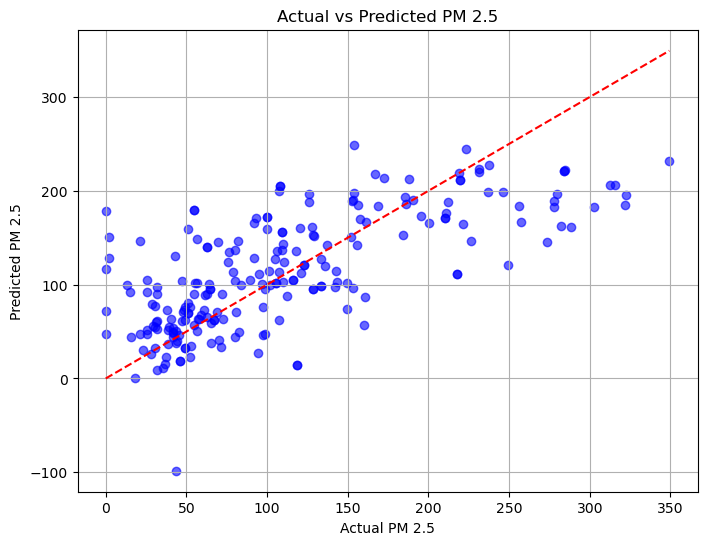

In [9]:
# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data
df = pd.read_csv("C:\\Users\\aryan\\Downloads\\AQI_Data - AQI_Data.csv")

# Select relevant columns (drop rows with missing values)
df = df[['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5']].dropna()

# Separate features (X) and target (Y)
X = df[['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']]  # All features
Y = df['PM 2.5']  # Target variable

# Debug: Check the shape of the dataset
print("Shape of features (X):", X.shape)
print("Shape of target (Y):", Y.shape)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Model parameters
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 Score):", r2)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.6)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.xlabel('Actual PM 2.5')
plt.ylabel('Predicted PM 2.5')
plt.title('Actual vs Predicted PM 2.5')
plt.grid()
plt.savefig("C:\\Users\\aryan\\OneDrive\\Desktop\\TEST\\Multivariate_Regression.png", bbox_inches='tight')
plt.show()
